In [1]:
import utils

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MultiLabelBinarizer

from sklearn.metrics.pairwise import rbf_kernel

In [2]:
# Load data
df_data = pd.read_csv('../data/ice-cat-office-products.csv.gz', dtype=str, index_col=0)

# Filter out small product categories
top_categories = utils.find_top_n_categories(df_data, top_n=3)
df_data = df_data[df_data.category_name.isin(top_categories)]

# Sort by category for later visualisation
df_data.sort_values('category_name', inplace=True)

# select a few features to avoid computational issues.
product_features = [
    'Product colour',
    'Format',
    'Width',
    'Height',
    'Maximum capacity',
    'Orientation',
    'Weight',
    'Material',
    'Depth',
    'Media weight',
    'Quantity per pack'
]

In [3]:
df_play_data = df_data[['category_name', 'supplier_name'] + product_features].copy()

In [4]:
df_play_data

,category_name,supplier_name,Product colour,Format,Width,Height,Maximum capacity,Orientation,Weight,Material,Depth,Media weight,Quantity per pack
83,Folders,Leitz,Red,A4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3616,Folders,Leitz,NaN,NaN,239,325,NaN,NaN,30,Carton,1,NaN,NaN
3619,Folders,Leitz,Red,A4,220,310,NaN,Portrait,20,Cardboard,NaN,NaN,NaN
3621,Folders,Leitz,NaN,A4,313,220,NaN,NaN,20,Polypropylene (PP),NaN,NaN,NaN
3622,Folders,Leitz,Red,A4,220,313,NaN,NaN,20,PVC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5687,Self-Adhesive Labels,Leitz,Orange,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN
5686,Self-Adhesive Labels,Leitz,Grey,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN
5684,Self-Adhesive Labels,Leitz,Brown,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN
5702,Self-Adhesive Labels,Leitz,Yellow,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN


In [5]:
# Prepare for preprocessing
df_play_cleaned, feature_dtypes = utils.prepare_for_preprocessing(df_play_data)

In [6]:
numeric_features = list(sorted(feature_dtypes['float'] + feature_dtypes['int32']))
categorical_features = feature_dtypes['category']
multi_categorical_features = feature_dtypes['multi-category']
binary_features = feature_dtypes['binary']

# Convert multi-categorical features to list of values.
for c in multi_categorical_features:
    df_play_cleaned[c] = df_play_cleaned[c].astype('str').apply(lambda r: [v.strip() for v in r.split(',')])

In [7]:
# Create data preprocessor
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
multi_categorical_transformer = utils.MultiHotEncoder()
preprocessor = ColumnTransformer(
    transformers=[
        ('nummerical', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features),
        ('multi-categorical', multi_categorical_transformer, multi_categorical_features),
        ('binary', 'passthrough', binary_features)
    ]
)

# Preprocess data
X = preprocessor.fit_transform(df_play_cleaned)

In [8]:
X.shape

(1286, 134)

In [9]:
distances = rbf_kernel(X)

In [10]:
distances.shape

(1286, 1286)

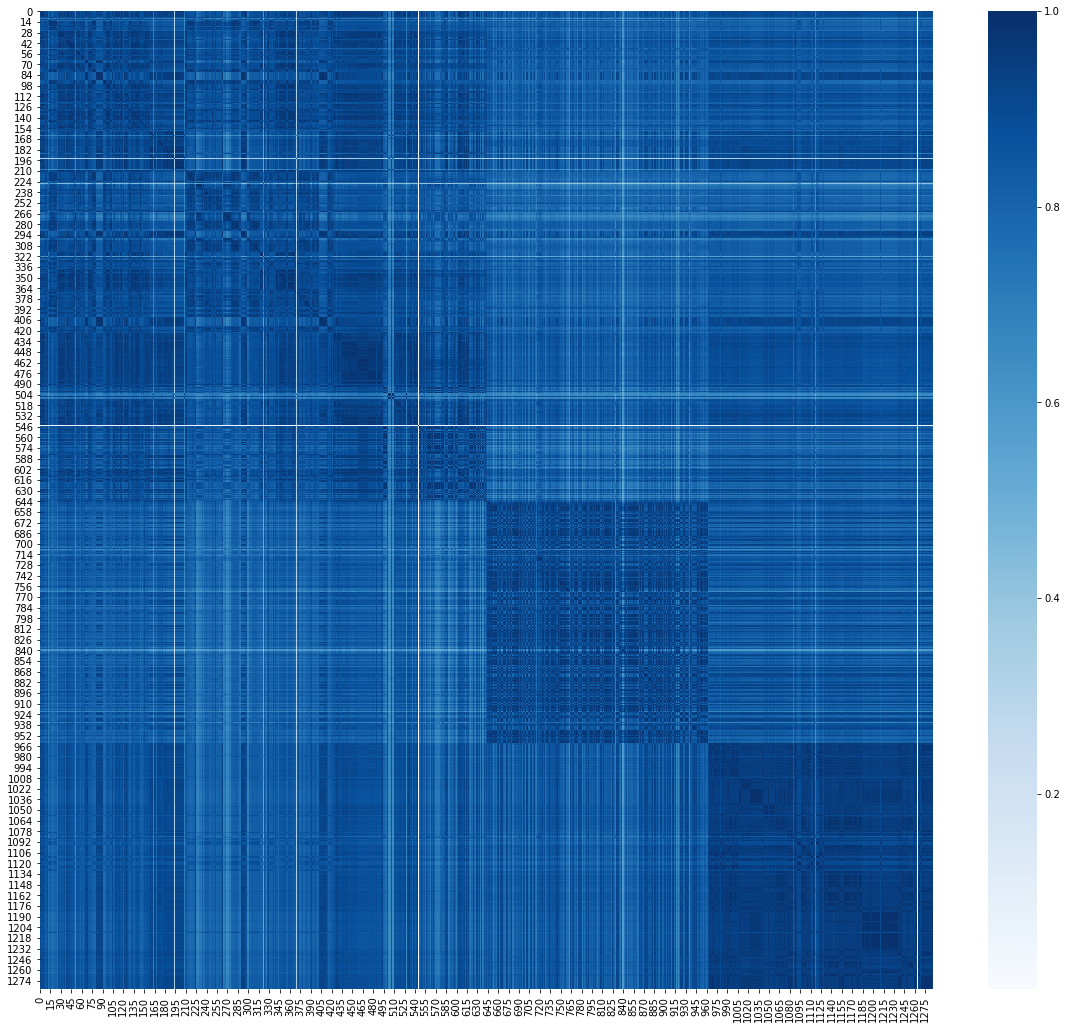

In [11]:
fig, ax = plt.subplots(figsize=(20, 18))
sns.heatmap(distances, cmap="Blues", ax=ax)
'';